# Trabalho 2

### 1. Realizar a importação dos dados utilizando o ucimlrepo e outros imports necessários para o código

In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import ray
from ray import tune
from ray.tune.schedulers import ASHAScheduler
import joblib
import time
import warnings
warnings.filterwarnings('ignore')
from ucimlrepo import fetch_ucirepo, list_available_datasets
import ssl
ssl._create_default_https_context = ssl._create_unverified_context # este import foi necessário por causa de um erro de SSL

In [526]:
list_available_datasets() # lista todos os datasets do ucimlrepo

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [527]:
dataset_id = 579 # dataset escolhido
dataset = fetch_ucirepo(id=dataset_id)
metadata = dataset.metadata
X_raw = dataset.data.features # features
y_raw = dataset.data.targets # labels
print("UCI dataset information")
print("-" * 60)
print(f"Dataset ID: {dataset_id}")
print(f"Dataset Name: {metadata.get('name', 'N/A')}")
print(f"Abstract: {metadata.get('abstract', 'N/A')[:100]}...")
X_raw.head()

UCI dataset information
------------------------------------------------------------
Dataset ID: 579
Dataset Name: Myocardial infarction complications
Abstract: Prediction of myocardial infarction complications...


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


### 2. Analizar o dataset


In [528]:
print("\n1. Shape, samples e features")
print("-" * 40)
print(f"Shape das features: {X_raw.shape}")
print(f"Shape dos targets: {y_raw.shape if y_raw is not None else 'Sem targets'}")
print(f"Total de samples: {X_raw.shape[0]}")
print(f"Total de features: {X_raw.shape[1]}")


1. Shape, samples e features
----------------------------------------
Shape das features: (1700, 111)
Shape dos targets: (1700, 12)
Total de samples: 1700
Total de features: 111


In [529]:
print("\n2. Informação sobre as features")
print("-" * 40)
print("Nome das features:", list(X_raw.columns))
print("\nData types das features:")
print(X_raw.dtypes)
print("\nSumário estatístico das features:")
print(X_raw.describe())


2. Informação sobre as features
----------------------------------------
Nome das features: ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09',

In [530]:
print("\n3. Informação sobre os targets")
print("-" * 40)
if y_raw is not None and len(y_raw.columns) > 0:
    print(f"Número de targets disponíveis: {len(y_raw.columns)}")
    
    for i, target_col in enumerate(y_raw.columns):
        print(f"\nTarget {i+1}: '{target_col}'")
        print(f"  Tipo de dados: {y_raw[target_col].dtype}")
        print(f"  Valores únicos: {y_raw[target_col].nunique()}")
        
        if y_raw[target_col].dtype in ['object', 'category']:
            print(f"  Classes: {y_raw[target_col].unique()}")
            print("  Distribuição das classes:")
            print(y_raw[target_col].value_counts())
        else:
            # For numeric targets, show statistics
            print("  Estatísticas dos targets numéricos:")
            print(f"    Min: {y_raw[target_col].min()}")
            print(f"    Max: {y_raw[target_col].max()}")
            print(f"    Mean: {y_raw[target_col].mean():.2f}")
            print(f"    Std: {y_raw[target_col].std():.2f}")
            
        # Check for missing values in target
        target_missing = y_raw[target_col].isnull().sum()
        if target_missing > 0:
            print(f"  ⚠️  Valores faltantes: {target_missing}")
        else:
            print("  ✅ Sem valores faltanges")
            
else:
    print("Sem target disponível")


3. Informação sobre os targets
----------------------------------------
Número de targets disponíveis: 12

Target 1: 'FIBR_PREDS'
  Tipo de dados: int64
  Valores únicos: 2
  Estatísticas dos targets numéricos:
    Min: 0
    Max: 1
    Mean: 0.10
    Std: 0.30
  ✅ Sem valores faltanges

Target 2: 'PREDS_TAH'
  Tipo de dados: int64
  Valores únicos: 2
  Estatísticas dos targets numéricos:
    Min: 0
    Max: 1
    Mean: 0.01
    Std: 0.11
  ✅ Sem valores faltanges

Target 3: 'JELUD_TAH'
  Tipo de dados: int64
  Valores únicos: 2
  Estatísticas dos targets numéricos:
    Min: 0
    Max: 1
    Mean: 0.02
    Std: 0.16
  ✅ Sem valores faltanges

Target 4: 'FIBR_JELUD'
  Tipo de dados: int64
  Valores únicos: 2
  Estatísticas dos targets numéricos:
    Min: 0
    Max: 1
    Mean: 0.04
    Std: 0.20
  ✅ Sem valores faltanges

Target 5: 'A_V_BLOK'
  Tipo de dados: int64
  Valores únicos: 2
  Estatísticas dos targets numéricos:
    Min: 0
    Max: 1
    Mean: 0.03
    Std: 0.18
  ✅ Sem valor

In [531]:
print("\n4. Análise de tipo de dados")
print("-" * 40)
numeric_cols = X_raw.select_dtypes(include=[np.number]).columns
categorical_cols = X_raw.select_dtypes(include=['object', 'category']).columns
print(f"Features numéricas: {len(numeric_cols)} - {list(numeric_cols)}")
print(f"Features categóricas: {len(categorical_cols)} - {list(categorical_cols)}")


4. Análise de tipo de dados
----------------------------------------
Features numéricas: 111 - ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_0

In [532]:
print("\n5. Sumário das estatísticas das features")
print("-" * 40)
if len(numeric_cols) > 0:
    print("Estatísticas numéricas:")
    print(X_raw[numeric_cols].describe())
    
if len(categorical_cols) > 0:
    print("\nEstatísticas categóricas:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(f"  Valores únicos: {X_raw[col].nunique()}")
        print(f"  Valores mais frequentes: {X_raw[col].mode().iloc[0] if not X_raw[col].mode().empty else 'N/A'}")


5. Sumário das estatísticas das features
----------------------------------------
Estatísticas numéricas:
               AGE          SEX     INF_ANAM    STENOK_AN    FK_STENOK  \
count  1692.000000  1700.000000  1696.000000  1594.000000  1627.000000   
mean     61.856974     0.626471     0.554835     2.316186     1.205286   
std      11.259936     0.483883     0.836801     2.440586     1.040814   
min      26.000000     0.000000     0.000000     0.000000     0.000000   
25%      54.000000     0.000000     0.000000     0.000000     0.000000   
50%      63.000000     1.000000     0.000000     1.000000     2.000000   
75%      70.000000     1.000000     1.000000     5.000000     2.000000   
max      92.000000     1.000000     3.000000     6.000000     4.000000   

          IBS_POST  IBS_NASL           GB   SIM_GIPERT      DLIT_AG  ...  \
count  1649.000000  72.00000  1691.000000  1692.000000  1452.000000  ...   
mean      1.160703   0.37500     1.393258     0.033688     3.340220  ...  

In [533]:
print("\n6. Análise de correlação")
print("-" * 40)
if len(numeric_cols) > 1:
    correlation_matrix = X_raw[numeric_cols].corr()
    print("Correlação das features:")
    print(correlation_matrix)



6. Análise de correlação
----------------------------------------
Correlação das features:
                 AGE       SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  \
AGE         1.000000 -0.394250  0.098238   0.232969   0.198185  0.103516   
SEX        -0.394250  1.000000  0.040448  -0.094112  -0.107890 -0.074199   
INF_ANAM    0.098238  0.040448  1.000000   0.330549   0.333040  0.211958   
STENOK_AN   0.232969 -0.094112  0.330549   1.000000   0.763019  0.332914   
FK_STENOK   0.198185 -0.107890  0.333040   0.763019   1.000000  0.385149   
...              ...       ...       ...        ...        ...       ...   
ANT_CA_S_n  0.029002 -0.025676 -0.027428  -0.023832  -0.030254  0.025466   
GEPAR_S_n  -0.098454  0.037798 -0.024480   0.001445  -0.033135 -0.072653   
ASP_S_n    -0.051282 -0.008669 -0.047126  -0.041660  -0.054698 -0.029356   
TIKL_S_n   -0.057878  0.029592 -0.014457  -0.046710  -0.031801 -0.026964   
TRENT_S_n  -0.028407  0.058567  0.009210   0.002514   0.019692 -0.048316

### 3. Gerar visualizações

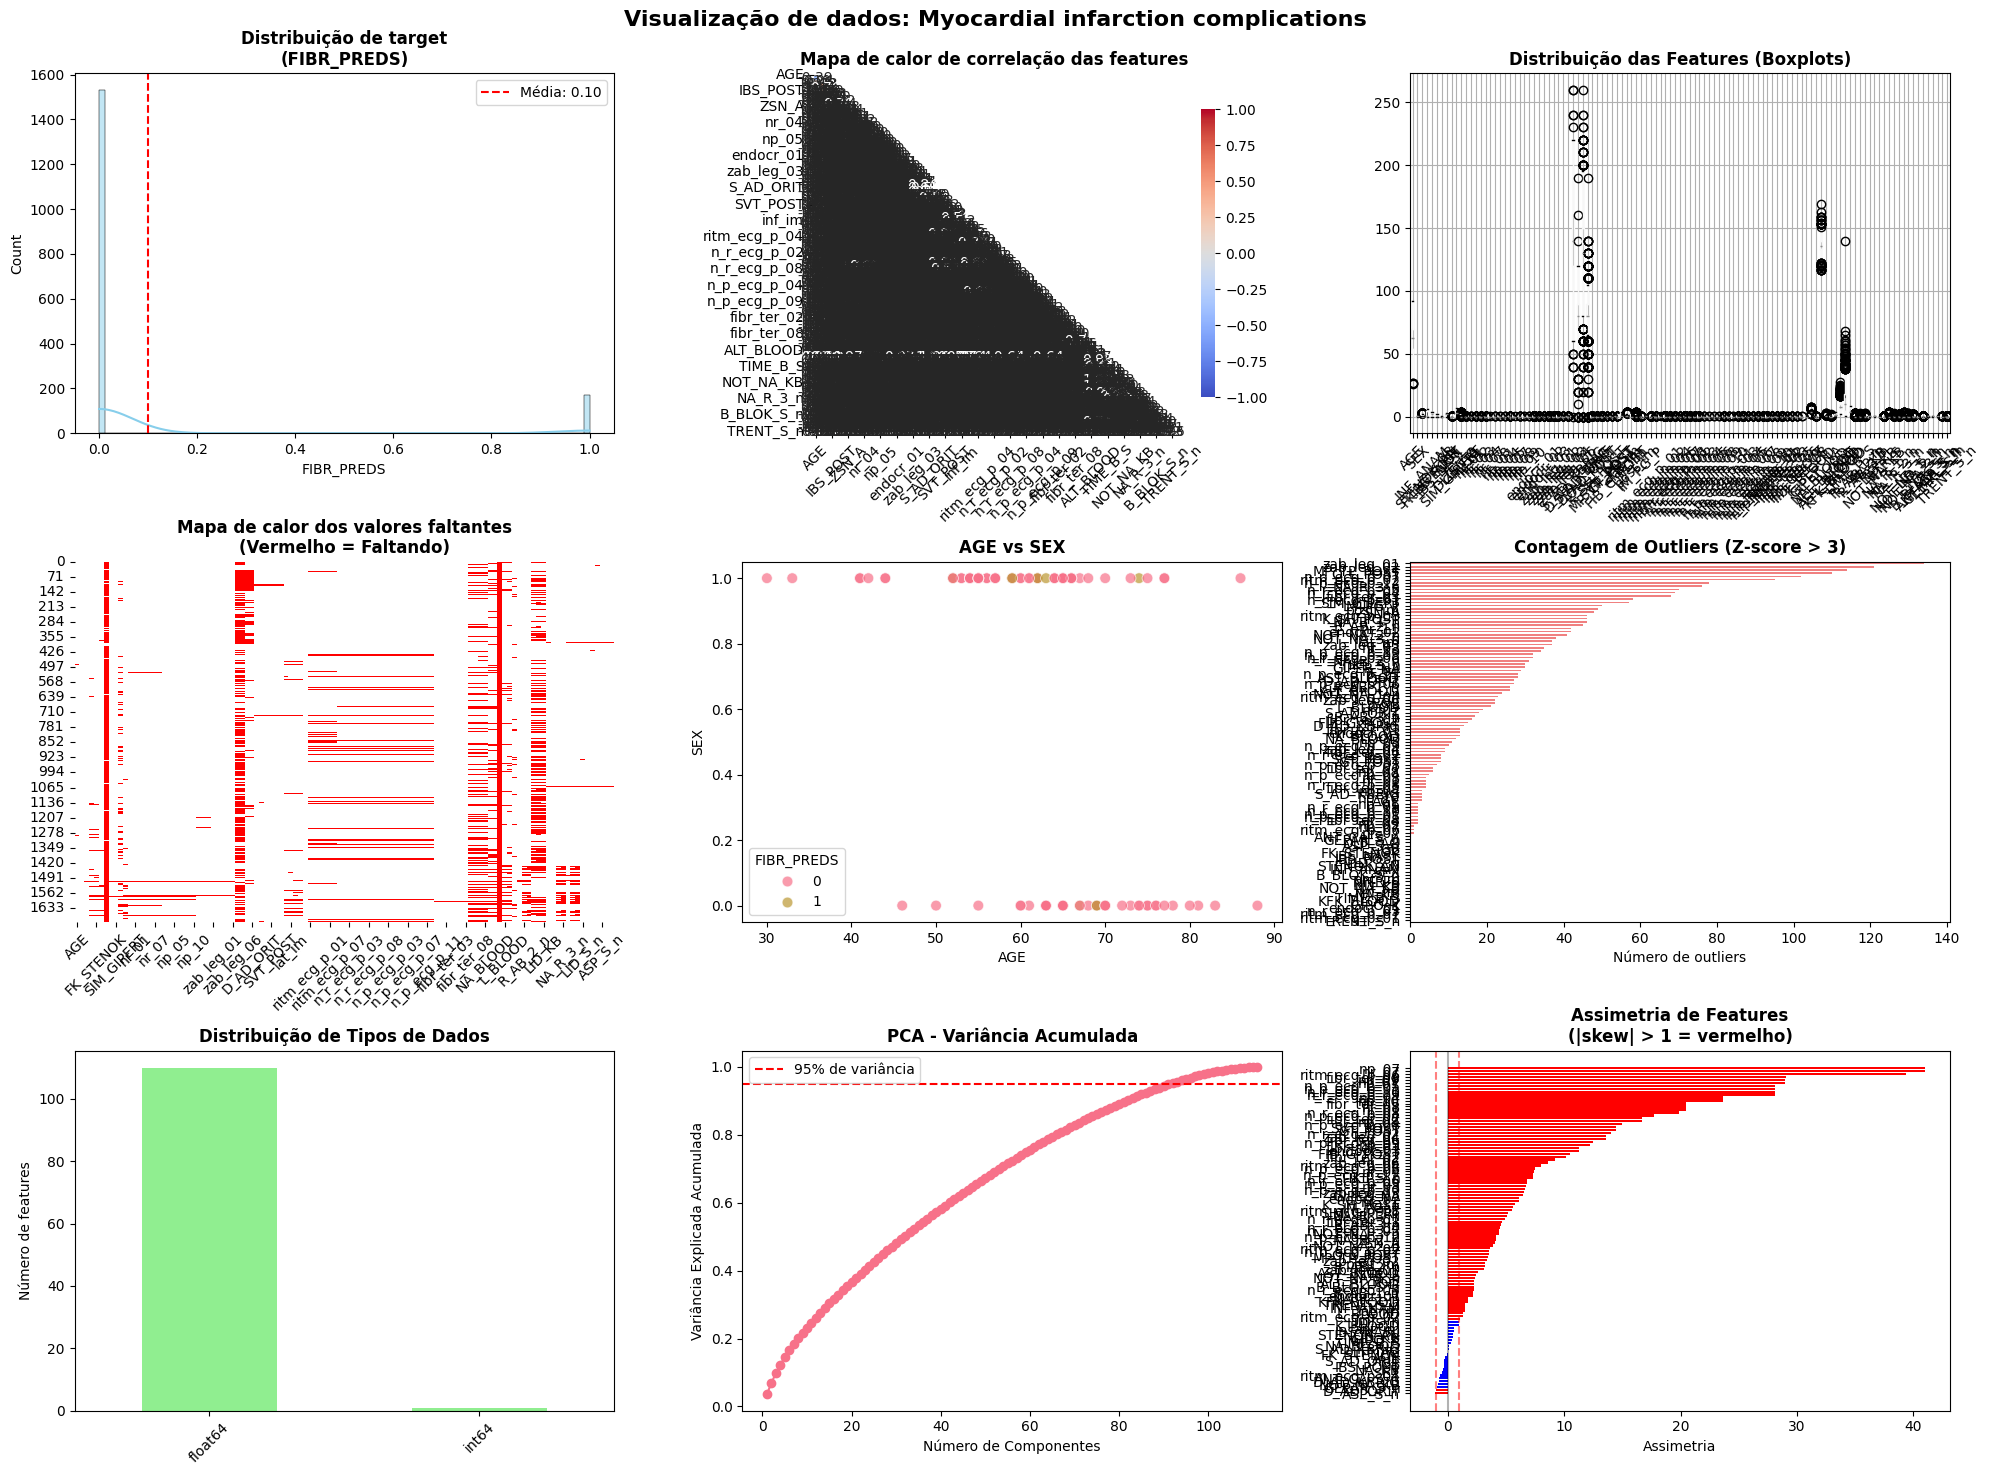


ANÁLISE ADICIONAL
Shape do Dataset: (1700, 111)
Valores faltantes: 15974
Features numéricas: 111
Features categóricas: 0
Variável target: FIBR_PREDS
Tipo da target: int64
Valores únicos da target: 2


In [534]:
plt.style.use('default')
sns.set_palette("husl")
fig = plt.figure(figsize=(20, 15))  # Reduzido de 18 para 15
fig.suptitle(f'Visualização de dados: {metadata.get("name", "Dataset")}',
             fontsize=16, fontweight='bold', y=0.98)

ax1 = plt.subplot(3, 3, 1)  # Mudado para grid 3x3
if y_raw is not None and len(y_raw.columns) > 0:
    target_col = y_raw.columns[0]
    if y_raw[target_col].dtype in ['object', 'category']:
        value_counts = y_raw[target_col].value_counts()
        colors = plt.cm.Set3(np.linspace(0, 1, len(value_counts)))
        wedges, texts, autotexts = ax1.pie(value_counts.values,
                                             labels=value_counts.index,
                                             autopct='%1.1f%%',
                                             colors=colors,
                                             startangle=90)
        ax1.set_title(f'Distribuição de target\n({target_col})', fontweight='bold')
    else:
        sns.histplot(y_raw[target_col], kde=True, ax=ax1, color='skyblue')
        ax1.axvline(y_raw[target_col].mean(), color='red', linestyle='--',
                    label=f'Média: {y_raw[target_col].mean():.2f}')
        ax1.legend()
        ax1.set_title(f'Distribuição de target\n({target_col})', fontweight='bold')
else:
    ax1.text(0.5, 0.5, 'Sem Target', ha='center', va='center')
    ax1.set_title('Distribuição de targets')

ax2 = plt.subplot(3, 3, 2)  # Mudado para grid 3x3
numeric_cols = X_raw.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    correlation_matrix = X_raw[numeric_cols].corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                mask=mask, square=True, ax=ax2, fmt='.2f', cbar_kws={'shrink': 0.8})
    ax2.set_title('Mapa de calor de correlação das features', fontweight='bold')
    plt.setp(ax2.get_xticklabels(), rotation=45)
else:
    ax2.text(0.5, 0.5, 'Sem features numéricas\npara mapa de calor',
             ha='center', va='center')
    ax2.set_title('Mapa de calor da correlação')

ax3 = plt.subplot(3, 3, 3)  # Mudado para grid 3x3
if len(numeric_cols) > 0:
    X_raw[numeric_cols].boxplot(ax=ax3)
    ax3.set_title('Distribuição das Features (Boxplots)', fontweight='bold')
    plt.setp(ax3.get_xticklabels(), rotation=45)
else:
    ax3.text(0.5, 0.5, 'Sem features numéricas', ha='center', va='center')
    ax3.set_title('Distribuição das Features')

ax4 = plt.subplot(3, 3, 4)  # Mudado para grid 3x3
missing_data = X_raw.isnull()
if missing_data.sum().sum() > 0:
    sns.heatmap(missing_data, cbar=False, cmap=['white', 'red'], ax=ax4)
    ax4.set_title('Mapa de calor dos valores faltantes\n(Vermelho = Faltando)', fontweight='bold')
    plt.setp(ax4.get_xticklabels(), rotation=45)
else:
    ax4.text(0.5, 0.5, 'Sem valores faltantes', ha='center', va='center',
             fontweight='bold', color='green')
    ax4.set_title('Mapa de calor dos valores faltantes')

# 5. Pairplot (Amostragem se o dataset for grande)
ax5 = plt.subplot(3, 3, 5)  # Mudado para grid 3x3
if len(numeric_cols) >= 2 and y_raw is not None and len(y_raw.columns) > 0:
    sample_size = min(100, len(X_raw))
    sample_df = pd.concat([X_raw[numeric_cols[:2]], y_raw], axis=1).sample(sample_size)
    
    if y_raw[target_col].dtype in ['object', 'category']:
        sns.scatterplot(data=sample_df, x=numeric_cols[0], y=numeric_cols[1],
                        hue=target_col, ax=ax5, s=60, alpha=0.7)
    else:
        sns.scatterplot(data=sample_df, x=numeric_cols[0], y=numeric_cols[1],
                        hue=target_col, ax=ax5, s=60, alpha=0.7)
    ax5.set_title(f'{numeric_cols[0]} vs {numeric_cols[1]}', fontweight='bold')
else:
    ax5.text(0.5, 0.5, 'Sem features suficientes\nou sem target para o pairplot',
             ha='center', va='center')
    ax5.set_title('Relação das Features')

# 6. Detecção de Outliers (antigo ax7)
ax6 = plt.subplot(3, 3, 6)  # Mudado para grid 3x3
if len(numeric_cols) > 0:
    # Z-score para detecção de outliers
    z_scores = np.abs((X_raw[numeric_cols] - X_raw[numeric_cols].mean()) / X_raw[numeric_cols].std())
    outlier_counts = (z_scores > 3).sum()
    
    outlier_counts.sort_values(ascending=True).plot(kind='barh', ax=ax6, color='lightcoral')
    ax6.set_title('Contagem de Outliers (Z-score > 3)', fontweight='bold')
    ax6.set_xlabel('Número de outliers')
else:
    ax6.text(0.5, 0.5, 'Sem features numéricas', ha='center', va='center')
    ax6.set_title('Detecção de Outliers')

# 7. Distribuição de Tipos de Dados (antigo ax8)
ax7 = plt.subplot(3, 3, 7)  # Mudado para grid 3x3
dtype_counts = X_raw.dtypes.value_counts()
dtype_counts.plot(kind='bar', ax=ax7, color='lightgreen')
ax7.set_title('Distribuição de Tipos de Dados', fontweight='bold')
ax7.set_ylabel('Número de features')
plt.setp(ax7.get_xticklabels(), rotation=45)

# 8. Variância Acumulada (PCA) (antigo ax9)
ax8 = plt.subplot(3, 3, 8)  # Mudado para grid 3x3
if len(numeric_cols) > 1:
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    from sklearn.impute import SimpleImputer
    
    # Imputar e escalar dados
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X_raw[numeric_cols])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)
    
    pca = PCA()
    pca.fit(X_scaled)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    
    ax8.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
    ax8.axhline(y=0.95, color='r', linestyle='--', label='95% de variância')
    ax8.set_xlabel('Número de Componentes')
    ax8.set_ylabel('Variância Explicada Acumulada')
    ax8.legend()
    ax8.set_title('PCA - Variância Acumulada', fontweight='bold')
else:
    ax8.text(0.5, 0.5, 'Sem features numéricas\nsuficientes para PCA',
             ha='center', va='center')
    ax8.set_title('Análise PCA')

# 9. Assimetria de Features (antigo ax11)
ax9 = plt.subplot(3, 3, 9)  # Mudado para grid 3x3
if len(numeric_cols) > 0:
    skewness = X_raw[numeric_cols].skew().sort_values()
    colors = ['red' if abs(skew) > 1 else 'blue' for skew in skewness.values]
    
    bars = ax9.barh(range(len(skewness)), skewness.values, color=colors)
    ax9.set_yticks(range(len(skewness)))
    ax9.set_yticklabels(skewness.index)
    ax9.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax9.axvline(x=1, color='red', linestyle='--', alpha=0.5)
    ax9.axvline(x=-1, color='red', linestyle='--', alpha=0.5)
    ax9.set_title('Assimetria de Features\n(|skew| > 1 = vermelho)', fontweight='bold')
    ax9.set_xlabel('Assimetria')
else:
    ax9.text(0.5, 0.5, 'Sem features numéricas', ha='center', va='center')
    ax9.set_title('Assimetria de Features')

plt.tight_layout()
plt.show()

# Adicional: Análise detalhada das features
print("\n" + "="*50)
print("ANÁLISE ADICIONAL")
print("="*50)
print(f"Shape do Dataset: {X_raw.shape}")
print(f"Valores faltantes: {X_raw.isnull().sum().sum()}")
print(f"Features numéricas: {len(numeric_cols)}")
print(f"Features categóricas: {len(X_raw.select_dtypes(include=['object', 'category']).columns)}")

if y_raw is not None and len(y_raw.columns) > 0:
    print(f"Variável target: {target_col}")
    print(f"Tipo da target: {y_raw[target_col].dtype}")
    print(f"Valores únicos da target: {y_raw[target_col].nunique()}")

### 4. Realizar o pré-processamento dos dados tratanto atributos to tipo object, valores nulos, normalização e redução de dimensionalidade


In [535]:
# Garantir que X e y têm o mesmo número de amostras
min_samples = min(len(X_raw), len(y_raw))
X_raw = X_raw.iloc[:min_samples]
y_raw = y_raw.iloc[:min_samples]

print(f"Após ajuste: X={X_raw.shape}, y={y_raw.shape}")

# Tratar target
if len(y_raw.columns) > 0:
    target_col = y_raw.columns[0]
    y = y_raw[target_col].copy()
    
    # Remover valores nulos do target
    valid_indices = y.notna()
    y = y[valid_indices]
    X_raw = X_raw[valid_indices]
    
    # Resetar índices
    y = y.reset_index(drop=True)
    X_raw = X_raw.reset_index(drop=True)
    
    print(f"Após remoção de NaNs no target: X={X_raw.shape}, y={len(y)}")
    
    # Codificar target se for categórico
    if y.dtype == 'object':
        le = LabelEncoder()
        y = le.fit_transform(y)
        print(f"Target codificado. Classes: {np.unique(y)}")
else:
    raise ValueError("Target não encontrado")

# Verificar consistência final
if len(X_raw) != len(y):
    raise ValueError(f"Inconsistência detectada: X tem {len(X_raw)} amostras, y tem {len(y)} amostras")

# Tratar features
X = X_raw.copy()

# a) Tratar valores nulos
missing_values = X.isnull().sum()
if missing_values.sum() > 0:
    print(f"Valores nulos encontrados: {missing_values[missing_values > 0]}")
    
    # Imputação separada para numéricos e categóricos
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    
    # Imputar numéricos com mediana
    if len(numeric_cols) > 0:
        num_imputer = SimpleImputer(strategy='median')
        X[numeric_cols] = num_imputer.fit_transform(X[numeric_cols])
    
    # Imputar categóricos com moda
    if len(categorical_cols) > 0:
        cat_imputer = SimpleImputer(strategy='most_frequent')
        X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])
    
    print("Valores nulos imputados")
else:
    print("Nenhum valor nulo encontrado")

# b) Tratar atributos object
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    print(f"Colunas categóricas encontradas: {list(categorical_cols)}")
    
    # One-hot encoding para colunas com poucas categorias
    for col in categorical_cols:
        if X[col].nunique() <= 10:  # One-hot para até 10 categorias
            X = pd.get_dummies(X, columns=[col], prefix=col, drop_first=True)
        else:
            # Frequency encoding para muitas categorias
            freq_encoding = X[col].value_counts().to_dict()
            X[col] = X[col].map(freq_encoding)
    
    print("Atributos categóricos tratados")
else:
    print("Nenhum atributo categórico encontrado")

# Verificar consistência após transformações
if len(X) != len(y):
    raise ValueError(f"Inconsistência após transformações: X tem {len(X)} amostras, y tem {len(y)} amostras")

# c) Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
print("Dados normalizados com StandardScaler")

# d) Redução de dimensionalidade
if X_scaled.shape[1] > 10:
    pca = PCA(n_components=0.95)  # Manter 95% da variância
    X_reduced = pca.fit_transform(X_scaled)
    print(f"PCA aplicado: {X_scaled.shape[1]} -> {X_reduced.shape[1]} componentes")
    print(f"Variância explicada: {np.sum(pca.explained_variance_ratio_):.3f}")
else:
    X_reduced = X_scaled.values
    print("PCA não aplicado (poucas features)")

print(f"Shape final: {X_reduced.shape}")

# Verificação final antes do split
print(f"Verificação final: X_reduced={X_reduced.shape}, y={len(y)}")
if X_reduced.shape[0] != len(y):
    raise ValueError(f"Erro final: X_reduced tem {X_reduced.shape[0]} amostras, y tem {len(y)} amostras")


Após ajuste: X=(1700, 111), y=(1700, 12)
Após remoção de NaNs no target: X=(1700, 111), y=1700
Valores nulos encontrados: AGE             8
INF_ANAM        4
STENOK_AN     106
FK_STENOK      73
IBS_POST       51
             ... 
ANT_CA_S_n     13
GEPAR_S_n      17
ASP_S_n        17
TIKL_S_n       16
TRENT_S_n      16
Length: 110, dtype: int64
Valores nulos imputados
Nenhum atributo categórico encontrado
Dados normalizados com StandardScaler
PCA aplicado: 111 -> 92 componentes
Variância explicada: 0.952
Shape final: (1700, 92)
Verificação final: X_reduced=(1700, 92), y=1700


### 5. Fazer o split dos dados para treino e teste


In [536]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Treino: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")
print(f"Proporção das classes no treino: {np.unique(y_train, return_counts=True)}")

Treino: 1360 amostras
Teste: 340 amostras
Proporção das classes no treino: (array([0, 1]), array([1224,  136]))


### 6. Treinar quatro classificadores diferentes ajustantando seus hiperparâmetros utilizando validação cruzada. Utilize o ray para distribuir o processamento para encontrar os melhores hiperparametros para cada classificador


In [537]:
model_configs = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'param_space': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'SVM': {
        'model': SVC(random_state=42, probability=True),
        'param_space': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'param_space': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_space': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    }
}

# Otimizar hiperparâmetros para cada classificador
best_models = {}
training_times = {}

for model_name, config in model_configs.items():
    print(f"\nOtimizando {model_name}...")
    start_time = time.time()
    
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        config['model'], 
        config['param_space'], 
        cv=cv, 
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )
    
    # Verificar dimensões antes do fit
    print(f"Dimensões para {model_name}: X_train={X_train.shape}, y_train={len(y_train)}")
    
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_
    
    # Treinar modelo final com melhores parâmetros
    if model_name == 'RandomForest':
        best_model = RandomForestClassifier(**best_params, random_state=42)
    elif model_name == 'SVM':
        best_model = SVC(**best_params, random_state=42, probability=True)
    elif model_name == 'GradientBoosting':
        best_model = GradientBoostingClassifier(**best_params, random_state=42)
    elif model_name == 'KNN':
        best_model = KNeighborsClassifier(**best_params)
    
    best_model.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    training_times[model_name] = training_time
    
    best_models[model_name] = best_model
    
    print(f"Melhores parâmetros para {model_name}: {best_params}")
    print(f"Melhor acurácia na validação: {best_accuracy:.4f}")
    print(f"Tempo de treinamento: {training_time:.2f}s")


Otimizando RandomForest...
Dimensões para RandomForest: X_train=(1360, 92), y_train=1360
Melhores parâmetros para RandomForest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Melhor acurácia na validação: 0.9000
Tempo de treinamento: 3.03s

Otimizando SVM...
Dimensões para SVM: X_train=(1360, 92), y_train=1360
Melhores parâmetros para SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Melhor acurácia na validação: 0.9000
Tempo de treinamento: 6.17s

Otimizando GradientBoosting...
Dimensões para GradientBoosting: X_train=(1360, 92), y_train=1360
Melhores parâmetros para GradientBoosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Melhor acurácia na validação: 0.9000
Tempo de treinamento: 7.05s

Otimizando KNN...
Dimensões para KNN: X_train=(1360, 92), y_train=1360
Melhores parâmetros para KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Melhor acurácia na validação: 0.8978
Tempo de treinamento: 0.09s


### 7. Gerar visualizações para as seguintes métricas de acurácia, precision e recall


Avaliando RandomForest...
Dimensões: X_test=(340, 92), y_test=340
Avaliando SVM...
Dimensões: X_test=(340, 92), y_test=340
Avaliando GradientBoosting...
Dimensões: X_test=(340, 92), y_test=340
Avaliando KNN...
Dimensões: X_test=(340, 92), y_test=340


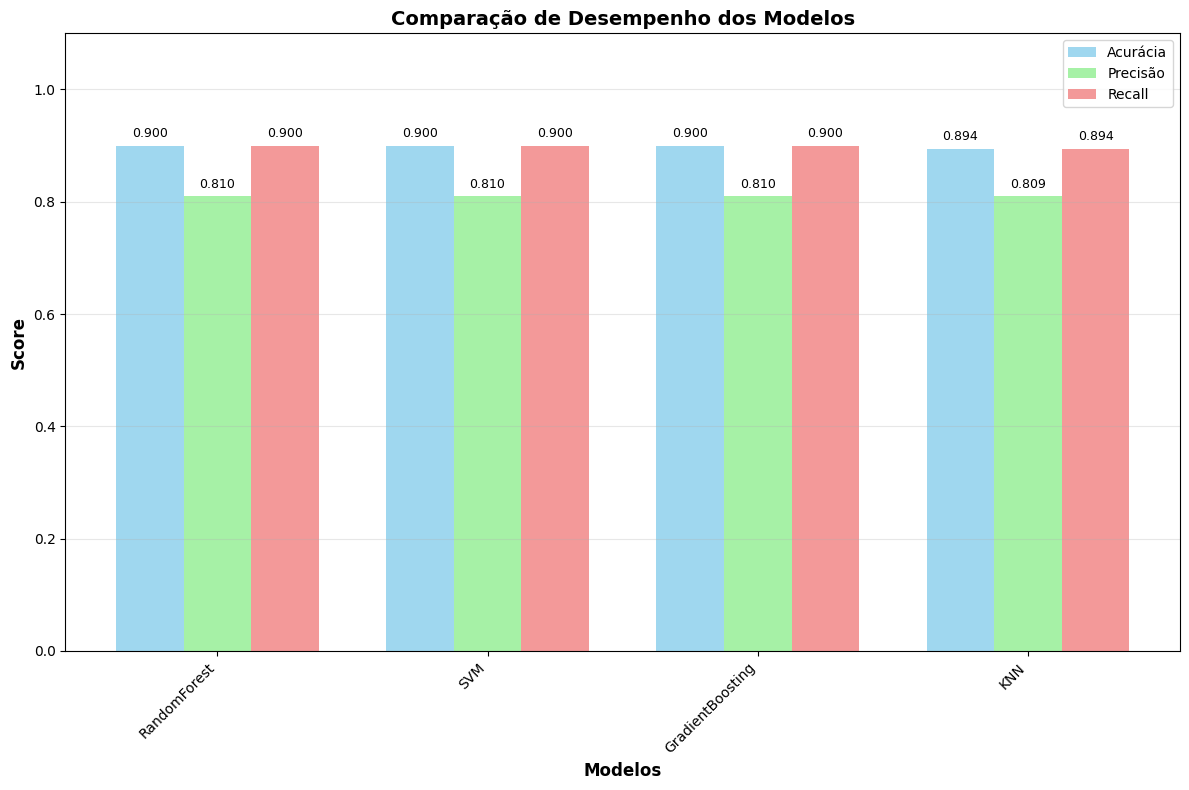

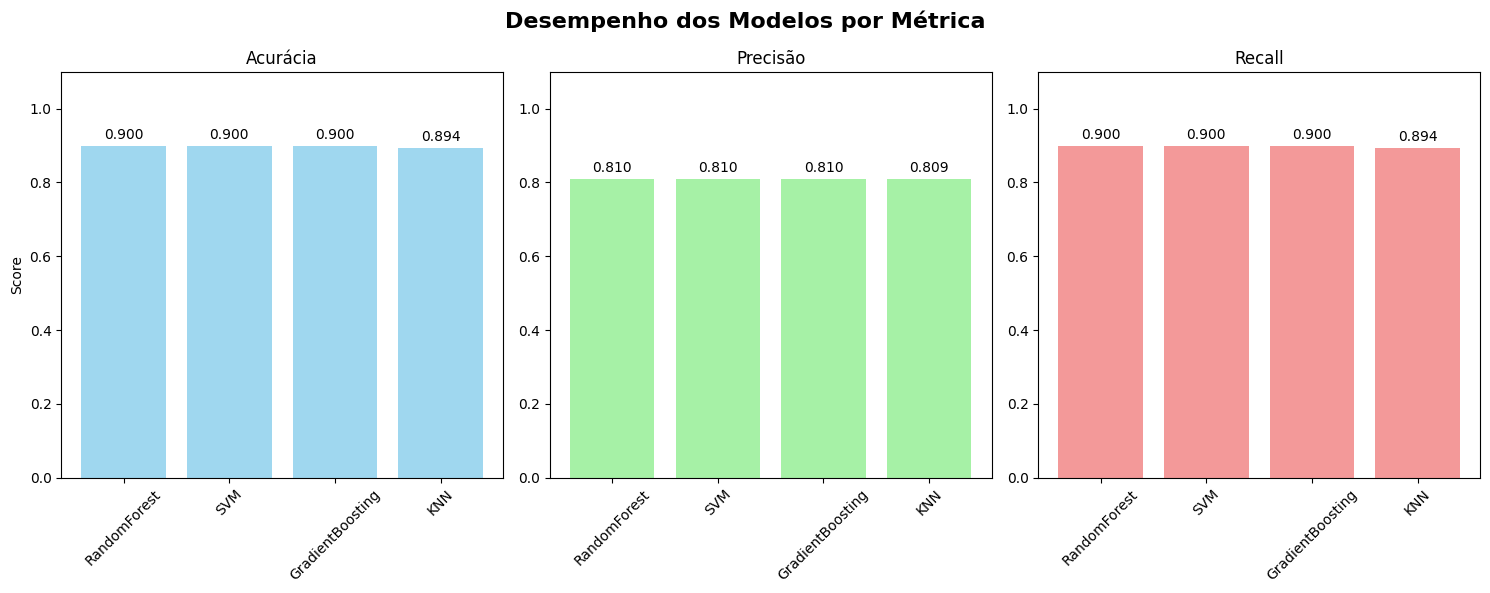


RESUMO DO DESEMPENHO DOS MODELOS
Modelo               Acurácia   Precisão   Recall    
------------------------------------------------------------
RandomForest         0.9000     0.8100     0.9000    
SVM                  0.9000     0.8100     0.9000    
GradientBoosting     0.9000     0.8100     0.9000    
KNN                  0.8941     0.8095     0.8941    

MELHORES MODELOS POR MÉTRICA:
Melhor Acurácia:  RandomForest (0.9000)
Melhor Precisão:  RandomForest (0.8100)
Melhor Recall:    RandomForest (0.9000)


In [538]:
import matplotlib.pyplot as plt
import numpy as np

# Preparar dados para o gráfico
results = {}
for model_name, model in best_models.items():
    print(f"Avaliando {model_name}...")
    print(f"Dimensões: X_test={X_test.shape}, y_test={len(y_test)}")
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'model': model,
        'y_pred': y_pred
    }
    
model_names = list(results.keys())
metrics = ['accuracy', 'precision', 'recall']

# Valores para cada métrica
accuracy_values = [results[model]['accuracy'] for model in model_names]
precision_values = [results[model]['precision'] for model in model_names]
recall_values = [results[model]['recall'] for model in model_names]

# Configurar o gráfico
plt.figure(figsize=(12, 8))
bar_width = 0.25
x_pos = np.arange(len(model_names))

# Criar barras para cada métrica
bars1 = plt.bar(x_pos - bar_width, accuracy_values, bar_width, 
                label='Acurácia', color='skyblue', alpha=0.8)
bars2 = plt.bar(x_pos, precision_values, bar_width, 
                label='Precisão', color='lightgreen', alpha=0.8)
bars3 = plt.bar(x_pos + bar_width, recall_values, bar_width, 
                label='Recall', color='lightcoral', alpha=0.8)

# Adicionar valores nas barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Configurar o gráfico
plt.xlabel('Modelos', fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.title('Comparação de Desempenho dos Modelos', fontsize=14, fontweight='bold')
plt.xticks(x_pos, model_names, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 1.1)  # Limite de 0 a 1.1 para métricas de 0-1

# Ajustar layout
plt.tight_layout()
plt.show()

# Versão alternativa: gráfico de barras agrupadas separado por métrica
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Desempenho dos Modelos por Métrica', fontsize=16, fontweight='bold')

# Gráfico de Acurácia
axes[0].bar(model_names, accuracy_values, color='skyblue', alpha=0.8)
axes[0].set_title('Acurácia')
axes[0].set_ylabel('Score')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 1.1)
for i, v in enumerate(accuracy_values):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Gráfico de Precisão
axes[1].bar(model_names, precision_values, color='lightgreen', alpha=0.8)
axes[1].set_title('Precisão')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 1.1)
for i, v in enumerate(precision_values):
    axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Gráfico de Recall
axes[2].bar(model_names, recall_values, color='lightcoral', alpha=0.8)
axes[2].set_title('Recall')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylim(0, 1.1)
for i, v in enumerate(recall_values):
    axes[2].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print dos resultados em formato de tabela
print("\n" + "="*60)
print("RESUMO DO DESEMPENHO DOS MODELOS")
print("="*60)
print(f"{'Modelo':<20} {'Acurácia':<10} {'Precisão':<10} {'Recall':<10}")
print("-"*60)

for model_name in model_names:
    acc = results[model_name]['accuracy']
    prec = results[model_name]['precision']
    rec = results[model_name]['recall']
    print(f"{model_name:<20} {acc:<10.4f} {prec:<10.4f} {rec:<10.4f}")

# Encontrar o melhor modelo por cada métrica
best_acc_model = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
best_prec_model = max(results.items(), key=lambda x: x[1]['precision'])[0]
best_rec_model = max(results.items(), key=lambda x: x[1]['recall'])[0]

print("\n" + "="*60)
print("MELHORES MODELOS POR MÉTRICA:")
print("="*60)
print(f"Melhor Acurácia:  {best_acc_model} ({results[best_acc_model]['accuracy']:.4f})")
print(f"Melhor Precisão:  {best_prec_model} ({results[best_prec_model]['precision']:.4f})")
print(f"Melhor Recall:    {best_rec_model} ({results[best_rec_model]['recall']:.4f})")

### 8. Gerar a matriz de confusão para cada classificador e plotar as regiões de decisão para os classificadores



<Figure size 1200x800 with 0 Axes>

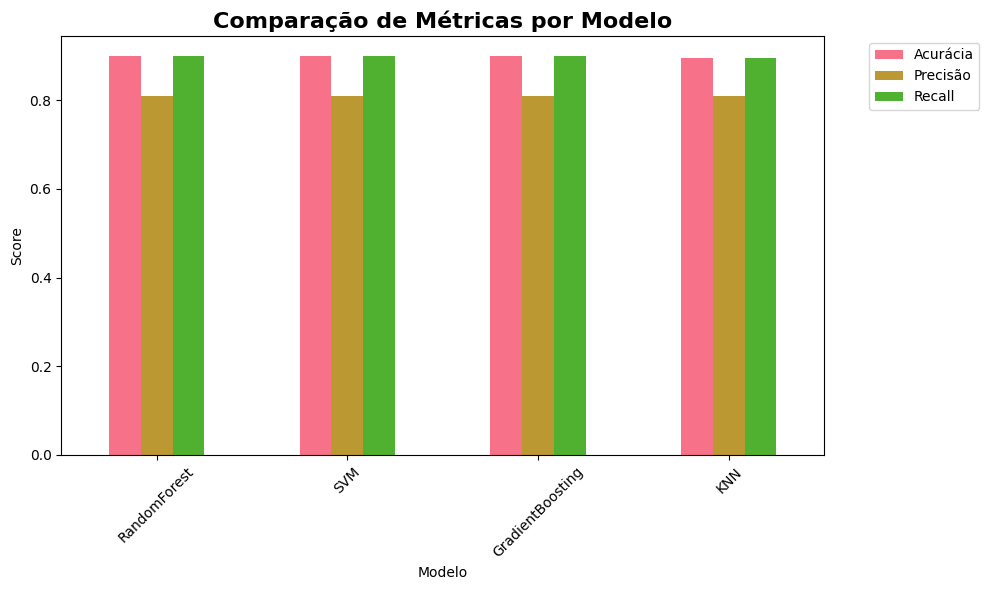

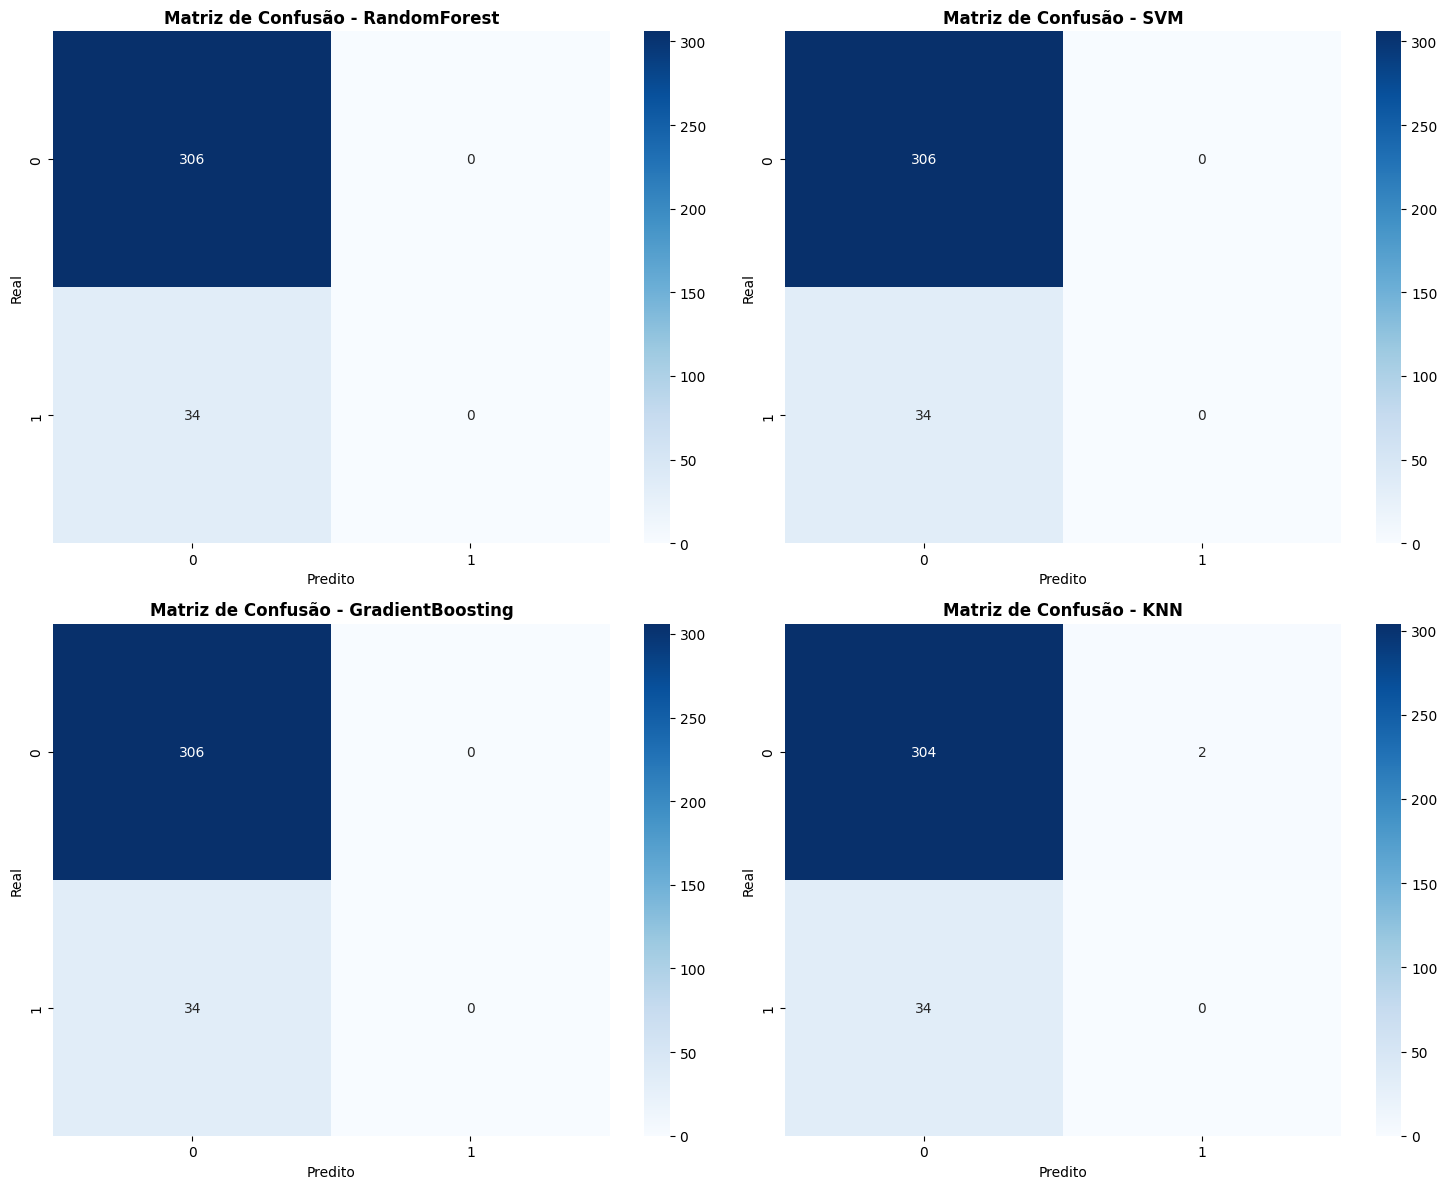


5.3 Plotando regiões de decisão...


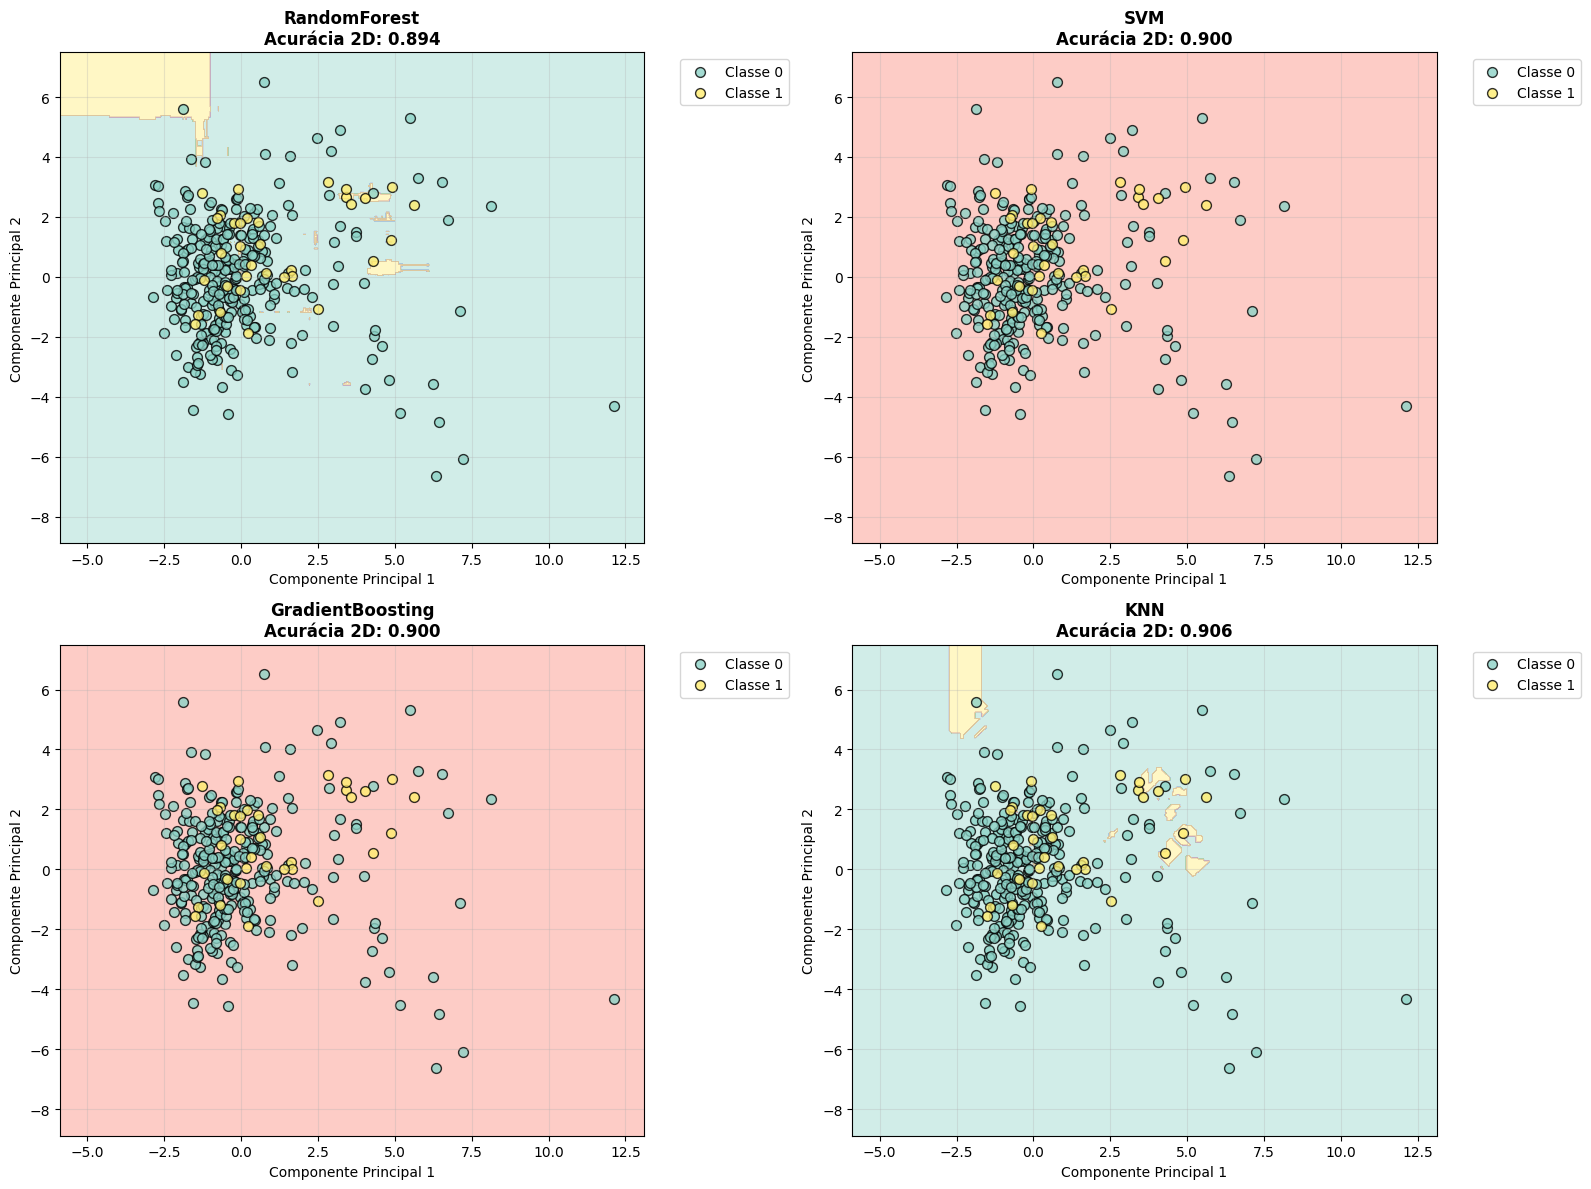

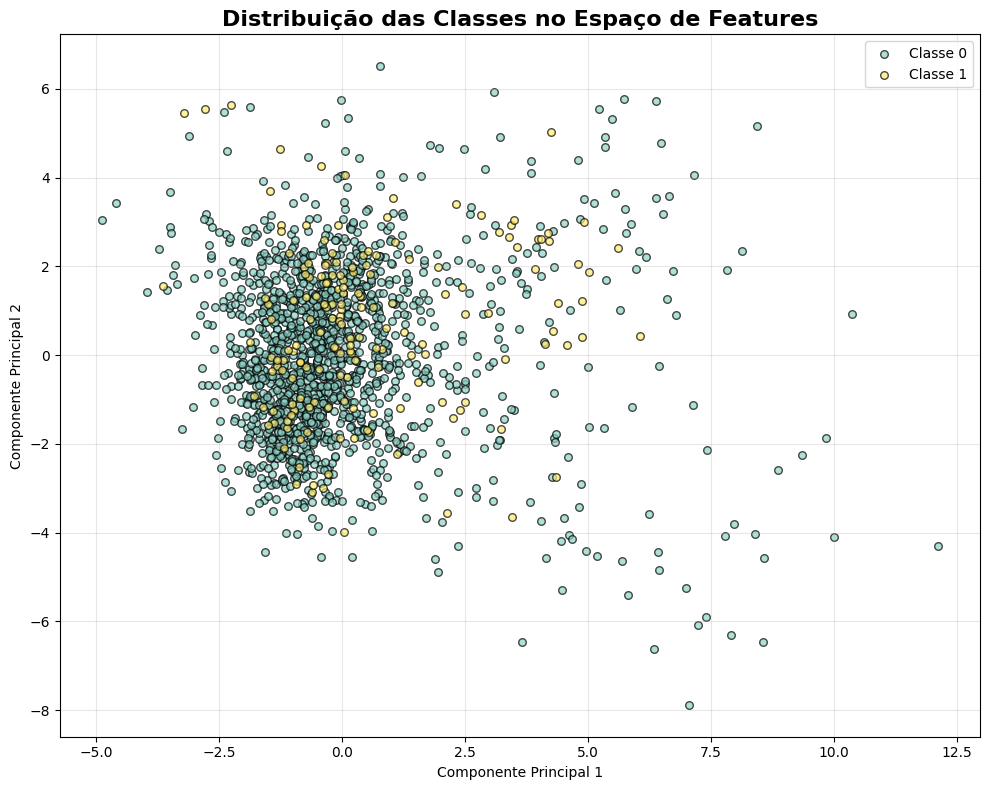

In [539]:
# 5.1 Gráfico de métricas
plt.figure(figsize=(12, 8))

# Métricas comparativas
metrics_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'Acurácia': [results[m]['accuracy'] for m in results],
    'Precisão': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results]
})

ax = metrics_df.set_index('Modelo').plot(kind='bar', figsize=(10, 6))
plt.title('Comparação de Métricas por Modelo', fontsize=16, fontweight='bold')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5.2 Matrizes de confusão
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, (model_name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Matriz de Confusão - {model_name}', fontweight='bold')
    axes[i].set_xlabel('Predito')
    axes[i].set_ylabel('Real')

plt.tight_layout()
plt.show()

# 5.3 Regiões de decisão (usando as duas primeiras componentes principais)
print("\n5.3 Plotando regiões de decisão...")

if X_reduced.shape[1] >= 2:
    # Usar apenas as duas primeiras features/componentes para visualização
    X_vis = X_reduced[:, :2]
    
    # Redividir os dados para visualização
    X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
        X_vis, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Treinar modelos com os mesmos hiperparâmetros otimizados
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()
    
    # Cores para as classes
    colors = plt.cm.Set3(np.linspace(0, 1, len(np.unique(y))))
    
    for i, (model_name, result) in enumerate(results.items()):
        # Obter o modelo já treinado e seus parâmetros
        trained_model = result['model']
        best_params = trained_model.get_params()
        
        # Criar novo modelo com os mesmos parâmetros para visualização 2D
        if model_name == 'RandomForest':
            vis_model = RandomForestClassifier(
                n_estimators=best_params.get('n_estimators', 100),
                max_depth=best_params.get('max_depth', None),
                min_samples_split=best_params.get('min_samples_split', 2),
                min_samples_leaf=best_params.get('min_samples_leaf', 1),
                random_state=42
            )
        elif model_name == 'SVM':
            vis_model = SVC(
                C=best_params.get('C', 1.0),
                kernel=best_params.get('kernel', 'rbf'),
                gamma=best_params.get('gamma', 'scale'),
                random_state=42,
                probability=True
            )
        elif model_name == 'GradientBoosting':
            vis_model = GradientBoostingClassifier(
                n_estimators=best_params.get('n_estimators', 100),
                learning_rate=best_params.get('learning_rate', 0.1),
                max_depth=best_params.get('max_depth', 3),
                random_state=42
            )
        elif model_name == 'KNN':
            vis_model = KNeighborsClassifier(
                n_neighbors=best_params.get('n_neighbors', 5),
                weights=best_params.get('weights', 'uniform'),
                p=best_params.get('p', 2)
            )
        
        # Treinar modelo com dados 2D
        vis_model.fit(X_train_vis, y_train_vis)
        
        # Criar meshgrid para plotar regiões de decisão
        h = 0.02  # tamanho do passo no meshgrid
        x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
        y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))
        
        # Prever para cada ponto do grid
        try:
            Z = vis_model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            
            # Plotar regiões de decisão
            axes[i].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set3)
            
            # Plotar pontos de teste com cores por classe
            for class_idx, color in enumerate(colors[:len(np.unique(y))]):
                class_mask = y_test_vis == class_idx
                if np.any(class_mask):
                    axes[i].scatter(X_test_vis[class_mask, 0], X_test_vis[class_mask, 1], 
                                  c=[color], s=50, edgecolor='black', alpha=0.8,
                                  label=f'Classe {class_idx}')
            
            # Calcular acurácia no conjunto 2D
            y_pred_vis = vis_model.predict(X_test_vis)
            acc_2d = accuracy_score(y_test_vis, y_pred_vis)
            
            axes[i].set_title(f'{model_name}\nAcurácia 2D: {acc_2d:.3f}', 
                            fontweight='bold', fontsize=12)
            axes[i].set_xlabel('Componente Principal 1' if X_reduced.shape[1] > 2 else 'Feature 1')
            axes[i].set_ylabel('Componente Principal 2' if X_reduced.shape[1] > 2 else 'Feature 2')
            axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            axes[i].grid(True, alpha=0.3)
            
        except Exception as e:
            axes[i].text(0.5, 0.5, f'Erro na visualização\n{model_name}\n{str(e)}', 
                       transform=axes[i].transAxes, ha='center', va='center',
                       bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))
            axes[i].set_title(f'{model_name} - Erro na visualização', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Plotar também a distribuição das classes no espaço 2D
    plt.figure(figsize=(10, 8))
    for class_idx, color in enumerate(colors[:len(np.unique(y))]):
        class_mask = y == class_idx
        if np.any(class_mask):
            plt.scatter(X_vis[class_mask, 0], X_vis[class_mask, 1], 
                       c=[color], s=30, alpha=0.7, edgecolor='black',
                       label=f'Classe {class_idx}')
    
    plt.title('Distribuição das Classes no Espaço de Features', 
             fontsize=16, fontweight='bold')
    plt.xlabel('Componente Principal 1' if X_reduced.shape[1] > 2 else 'Feature 1')
    plt.ylabel('Componente Principal 2' if X_reduced.shape[1] > 2 else 'Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("Dados têm menos de 2 dimensões. Não é possível plotar regiões de decisão.")